## LGMVIP - DATA SCIENCE ( Task 3 )
### INTERMEDIATE LEVEL TASK - Prediction using Decision Tree  Algorithm
#### URVI HARIA - MARCH 2023

### Step 1 : Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

### Step 2 : Loading the dataset

In [2]:
iris_data=pd.read_csv("D:/Data/Desktop/masters in ds/machine learning/Iris.csv")

### Step 3 : Summarizing the dataset

In [3]:
# Peek at the data
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Statistical Summary
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Dimension of the data
iris_data.shape

(150, 6)

In [7]:
# Checking for missing values 
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# checking unique values in dataset
iris_data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Step 4 : Visualizing the dataset

#### Univariate plots

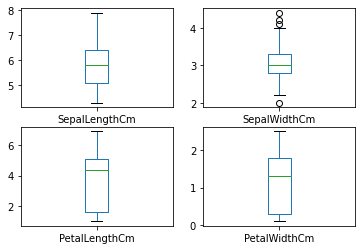

In [9]:
# box and whisker plots

# We start with some univariate plots, that is, plots of each individual variable.
# Given that the input variables are numeric, we can create box and whisker plots of each.
# This gives us a much clearer idea of the distribution of the input attributes

iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]\
.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

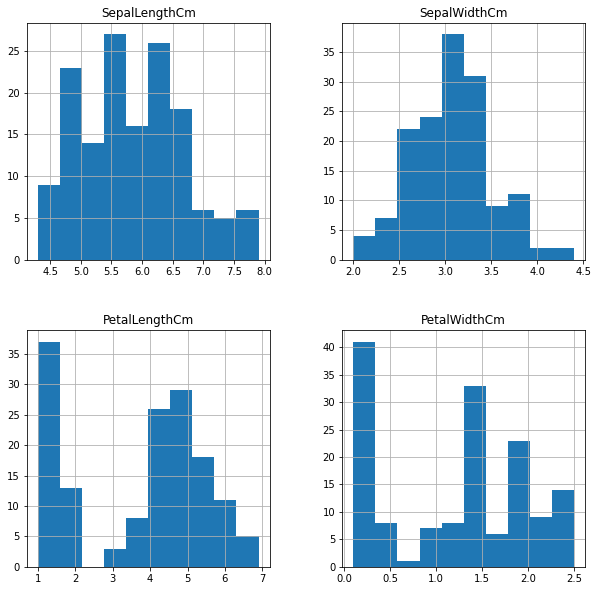

In [10]:
# We can also create a histogram of each input variable to get an idea of the distribution.
# histograms
iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]].hist(figsize=(10,10))
plt.show()

#### Multivariate Plots

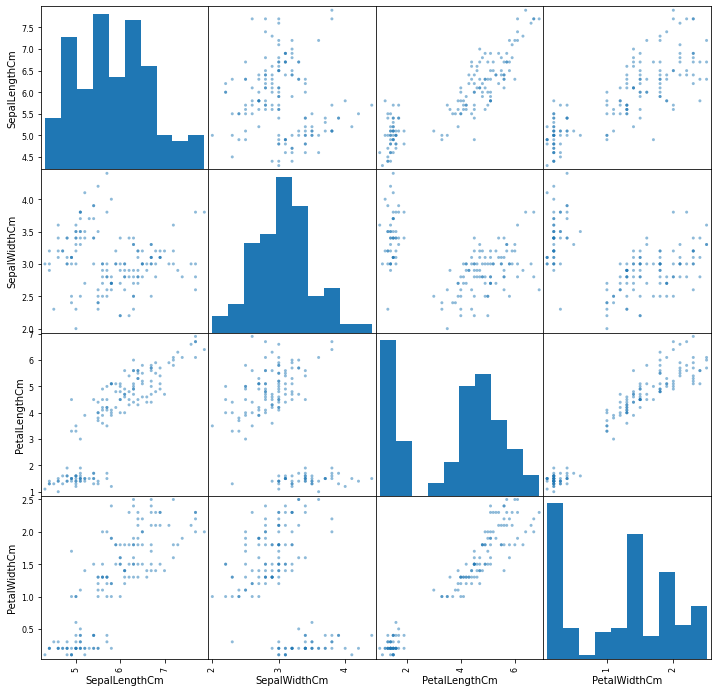

In [11]:
# Now we can look at the interactions between the variables.
# First, let’s look at scatterplots of all pairs of attributes. 
# This can be helpful to spot structured relationships between input variables.

# scatter plot matrix
scatter_matrix(iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]],figsize=(12,12))
plt.show()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

In [12]:
iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


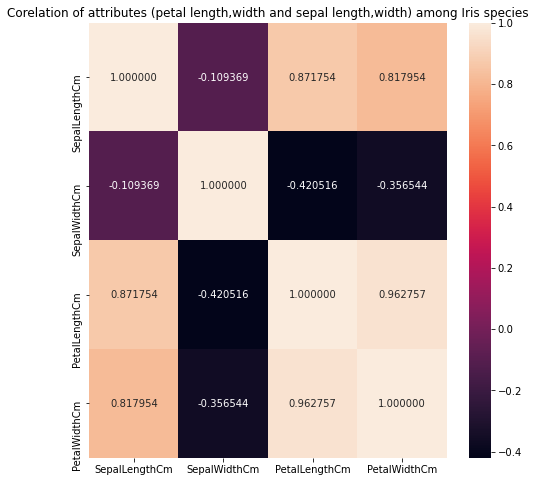

In [13]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
            .corr(),annot=True,fmt="f")\
.set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

According to the heatmap we can clearly see that correlation between the Sepal Width and Length is very low whereas the correlation between Petal Width and Length is very high

### Step 5 : Evaluating Some Algorithms

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [14]:
# first we need to drop the column which is not required 
iris_data.drop(["Id"],axis=1 , inplace=True)

In [16]:
# Split-out validation dataset
from sklearn.model_selection import KFold,train_test_split,cross_val_score
array = iris_data.values
X = iris_data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = iris_data["Species"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [17]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Confusion Matrix - A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes.
It plots a table of all the predicted and actual values of a classifier.

Accuracy: The accuracy is used to find the portion of correctly classified values. It tells us how often our classifier is right. It is the sum of all true values divided by total values.

Precision: Precision is used to calculate the model's ability to classify positive values correctly. It is the true positives divided by the total number of predicted positive values.

Recall: It is used to calculate the model's ability to predict positive values. "How often does the model predict the correct positive values?". It is the true positives divided by the total number of actual positive values.  


F1-Score: It is the harmonic mean of Recall and Precision. It is useful when you need to take both Precision and Recall into account.


#### Logistic Regression

In [18]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy_lr=accuracy_score(Y_test,Y_pred)
acc_log = model.score(X_train, Y_train)


cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression :%.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy_Logistic Regression :0.967
precision_Logistic Regression : 0.967
recall_Logistic Regression: 0.967
f1-score_Logistic Regression : 0.967


#### K Neighbors Classifier

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=accuracy_score(Y_test,Y_pred)
acc_knn =knn.score(X_train, Y_train)

cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy_KNN : 1.000
precision_KNN : 1.000
recall_KNN: 1.000
f1-score_KNN : 1.000


#### Random Forest

In [20]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=accuracy_score(Y_test,Y_prediction)
acc_random_forest = random_forest.score(X_train, Y_train)


cm = confusion_matrix(Y_test, Y_prediction)
accuracy = accuracy_score(Y_test,Y_prediction)
precision =precision_score(Y_test, Y_prediction,average='micro')
recall =  recall_score(Y_test, Y_prediction,average='micro')
f1 = f1_score(Y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy_random_Forest : 0.967
precision_random_Forest : 0.967
recall_random_Forest : 0.967
f1-score_random_Forest : 0.967


#### Gaussian Naive Bayes

In [21]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=accuracy_score(Y_test,Y_pred)
acc_gaussian = gaussian.score(X_train, Y_train)

cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy_Naive Bayes: 0.967
precision_Naive Bayes: 0.967
recall_Naive Bayes: 0.967
f1-score_Naive Bayes : 0.967


#### Linear Support Vector Machine

In [22]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=accuracy_score(Y_test,Y_pred)
acc_linear_svc =linear_svc.score(X_train, Y_train)

cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[11  0  0]
 [ 0 10  3]
 [ 0  0  6]]
accuracy_SVC: 0.900
precision_SVC: 0.900
recall_SVC: 0.900
f1-score_SVC : 0.900


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Decision Tree

In [23]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=accuracy_score(Y_test,Y_pred)
acc_decision_tree = decision_tree.score(X_train, Y_train)

cm = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall =  recall_score(Y_test, Y_pred,average='micro')
f1 = f1_score(Y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy_DecisionTree: 0.967
precision_DecisionTree: 0.967
recall_DecisionTree: 0.967
f1-score_DecisionTree : 0.967


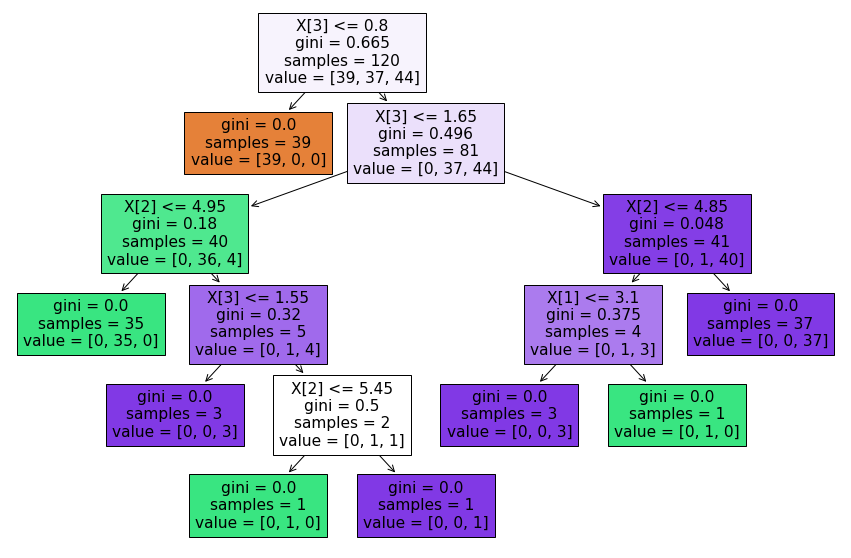

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, Y_train)  ,filled=True)
plt.show()

#### determining best model

In [25]:
results=pd.DataFrame({'Model':['KNN','Logistic Regression','Random Forest','Naive Bayes','Support Vector Machine','Decision Tree'],
    'Score': [ acc_knn,acc_log, acc_random_forest,acc_gaussian, acc_linear_svc,acc_decision_tree],
    "Accuracy_score":[accuracy_knn,accuracy_lr,accuracy_rf,accuracy_nb,accuracy_svc,accuracy_dt]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Score,Accuracy_score
0,KNN,0.950000,1.000000
1,Logistic Regression,0.983333,0.966667
2,Random Forest,1.000000,0.966667
3,Naive Bayes,0.950000,0.966667
4,Decision Tree,1.000000,0.966667
5,Support Vector Machine,0.975000,0.900000


we can clearly see that KNN model gives 100% accuracy.